In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.shape

(5110, 12)

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# Filling the missing values with mean
mean_val=df['bmi'].mean()
df['bmi'].fillna(value=mean_val,inplace=True)

In [8]:
# Data after preprocessing
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [10]:
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])


In [11]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [12]:
data["target"]=df["stroke"]

In [16]:
df.drop("stroke",axis=1,inplace=True)

In [17]:
df.shape

(5110, 22)

In [18]:
df["target"]=data["target"]

In [19]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,target
0,9046,67.0,0,1,228.69,36.600000,0,1,0,0,...,1,0,0,0,1,0,1,0,0,1
1,51676,61.0,0,0,202.21,28.893237,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
2,31112,80.0,0,1,105.92,32.500000,0,1,0,0,...,1,0,0,1,0,0,0,1,0,1
3,60182,49.0,0,0,171.23,34.400000,1,0,0,0,...,1,0,0,0,1,0,0,0,1,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1


In [20]:
np.dot(df["avg_glucose_level"],df["bmi"])

15972654.654984314

In [21]:
np.linalg.norm(df["avg_glucose_level"])

8249.39831687742

In [22]:
grouped=df.groupby("target")
grouped.first()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
target,,,,,,,,,,,,,,,,,,,,,
0,30669,3.0,0,0,95.12,18.0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
1,9046,67.0,0,1,228.69,36.6,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [23]:
class_A_data = df[df['target'] == 0]
class_B_data = df[df['target'] == 1]

In [24]:
import numpy as np
centroid_A = np.mean(class_A_data, axis=0)
centroid_B = np.mean(class_B_data, axis=0)


In [26]:
centroid_A

id                                36487.236371
age                                  41.971545
hypertension                          0.088871
heart_disease                         0.047110
avg_glucose_level                   104.795513
bmi                                  28.825388
gender_Female                         0.586916
gender_Male                           0.412878
gender_Other                          0.000206
ever_married_No                       0.355482
ever_married_Yes                      0.644518
work_type_Govt_job                    0.128369
work_type_Never_worked                0.004526
work_type_Private                     0.571076
work_type_Self-employed               0.155112
work_type_children                    0.140918
Residence_type_Rural                  0.493726
Residence_type_Urban                  0.506274
smoking_status_Unknown                0.307961
smoking_status_formerly smoked        0.167661
smoking_status_never smoked           0.370706
smoking_statu

In [27]:
centroid_B

id                                37115.068273
age                                  67.728193
hypertension                          0.265060
heart_disease                         0.188755
avg_glucose_level                   132.544739
bmi                                  30.217789
gender_Female                         0.566265
gender_Male                           0.433735
gender_Other                          0.000000
ever_married_No                       0.116466
ever_married_Yes                      0.883534
work_type_Govt_job                    0.132530
work_type_Never_worked                0.000000
work_type_Private                     0.598394
work_type_Self-employed               0.261044
work_type_children                    0.008032
Residence_type_Rural                  0.457831
Residence_type_Urban                  0.542169
smoking_status_Unknown                0.188755
smoking_status_formerly smoked        0.281124
smoking_status_never smoked           0.361446
smoking_statu

In [28]:
centroid_A = np.std(class_A_data,axis=0)
centroid_B = np.std(class_B_data,axis=0)

In [29]:
x = np.linalg.norm(centroid_A - centroid_B)
x

831.427856343904

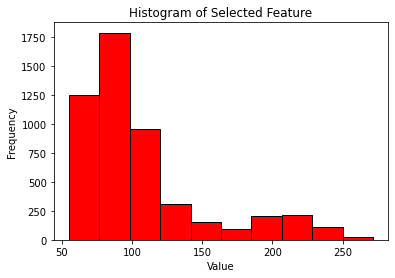

In [30]:

import numpy as np
import matplotlib.pyplot as plt

selected_feature = df['avg_glucose_level']
num_bins =10
hist, bins = np.histogram(selected_feature, bins=num_bins)

plt.hist(selected_feature, bins=num_bins,  color='r', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Selected Feature')
plt.show()

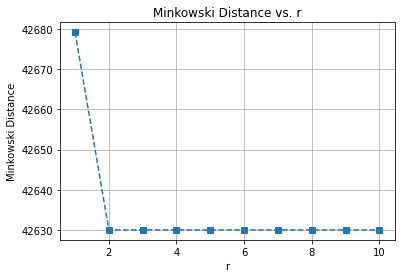

In [31]:
import numpy as np
import matplotlib.pyplot as plt
vector1 = df.iloc[0, :]
vector2 = df.iloc[1, :]
distances = []
r_values = list(range(1, 11))
for r in r_values:
    distance = np.power(np.sum(np.abs(vector1 - vector2) ** r), 1/r)
    distances.append(distance)

plt.plot(r_values, distances, marker='s', linestyle='--')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs. r')
plt.grid(True)
plt.show()

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
x = df.drop("target",axis=1)
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
y_preds=knn.predict(x_test.values)
y_preds

C:\Users\deven\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

matrix=confusion_matrix(y_test,y_preds)
report = classification_report(y_test,y_preds)


In [39]:
print(matrix)

[[1160   51]
 [  63    4]]


In [40]:
print(report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1211
           1       0.07      0.06      0.07        67

    accuracy                           0.91      1278
   macro avg       0.51      0.51      0.51      1278
weighted avg       0.90      0.91      0.91      1278



In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
def evaluate_preds(y_true,y_preds):
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = { "accuracy": round(accuracy,2),
                   "precision" : round(precision,2),
                  "recall": round(recall,2),
                  "f1":round(f1,2)}
    print(f"Acc       : {accuracy*100:.2f}%")
    print(f"Precision : {precision*100:.2f}%")
    print(f"Recall    : {recall*100:.2f}%")
    print(f"F1_score  : {f1*100:.2f}%")
    return metric_dict

In [46]:
metrics = evaluate_preds(y_test,y_preds)
metrics

Acc       : 91.08%
Precision : 7.27%
Recall    : 5.97%
F1_score  : 6.56%


{'accuracy': 0.91, 'precision': 0.07, 'recall': 0.06, 'f1': 0.07}